<div style="font-family: 'Linux Libertine', serif; text-align: left;">
    <div style="font-size: 58px; font-weight: bold;color: #000000">
        <b>Investment Portfolio Management</b>
    </div>
    <hr style="border: none;
               border-top: 1.25px solid #E0E0E0;
               width: 100%;
               margin-top: 20px;
               margin-bottom: 20px;
               margin-left: auto;
               margin-right: auto;">
</div>

<br><br><br>
<div style="font-family: 'Roboto', Arial, sans-serif; text-align: left; font-size: 14px; letter-spacing: 1.75px; margin-top: 25px; margin-bottom: 25px;font-weight: bold;color: #000000;">
    Table of Contents
</div>
<br>

- [Introduction](#intro)<br><br>
- [Portfolio Allocation](#allocation)<br><br>
- [Portfolio Analysis](#analysis)<br><br>
- [Portfolio vs Benchmark](#benchmark)<br><br>
- [Testing Functions](#test)<br><br>
- [The App](#app)<br><br>

<div id = 'intro'
     style="font-family: 'Linux Libertine', serif;font-size: 52px; font-weight: bold;color: #000000">
        <b>Introduction</b>
    <hr style="border: none;
               border-top: 1.25px solid #E0E0E0;
               width: 100%;
               margin-top: 20px;
               margin-bottom: 20px;
               margin-left: 0px;
               margin-right: auto;">
</div>

<p style="font-family: 'Arial', sans-serif; font-size: 20px;color: #000000;">Tracking investment performance and making strategic decisions can be a headache. Complex financial jargon, complicated data, and an overload of raw numbers create a recipe for confusion, inaction, and poor choices.</p>
<br>
<p style="font-family: 'Arial', sans-serif; font-size: 20px;color: #000000;">That's why I have built an <b>investment portfolio management</b> with Python and Streamlit. It cuts through the noise and translates raw financial data into digestible, interactive visuals. Instead of drowning in numbers, you get an intuitive dashboard that helps you see portfolio breakdowns, identify potential risks, and track historical trends to guide your decision-making process.</p>
<br>

In [1]:
# Installing yfinance for retrieving financial data
!pip install yfinance --quiet

In [2]:
# Importing libraries

# Pandas & NumPy
import pandas as pd
import numpy as np

# Yfinance to retrieve financial data 
import yfinance as yf

# Plotly for Data Visualization
import plotly.express as px
import plotly.graph_objs as go
import plotly.subplots as sp
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import plotly.io as pio
from IPython.display import display, YouTubeVideo
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

import warnings
warnings.filterwarnings('ignore')

<div id = 'allocation'
     style="font-family: 'Linux Libertine', serif;font-size: 52px; font-weight: bold;color: #000000">
        <b>Portfolio Allocation</b>
    <hr style="border: none;
               border-top: 1.25px solid #E0E0E0;
               width: 100%;
               margin-top: 20px;
               margin-bottom: 20px;
               margin-left: 0px;
               margin-right: auto;">
</div>

<p style="font-family: 'Arial', sans-serif; font-size: 20px;color: #000000;">Portfolio allocation is crucial for understanding the composition of your investments across different asset classes, such as stocks, bonds, cryptocurrencies, and others. The goal is to effectively create a mix of investments that aligns with your financial goals, timeline, and risk tolerance.</p>
<br>
<p style="font-family: 'Arial', sans-serif; font-size: 20px;color: #000000;">It helps you measure the degree of diversification, which may help to minimize risk by placing several investments in different sectors and asset classes. It is also helpful in measuring exposition to riskier or low-performing investments, which allows you to realign your portfolio according to your risk tolerance and financial goals.</p>
<br>
<p style="font-family: 'Arial', sans-serif; font-size: 20px;color: #000000;">The <code>portfolio_returns</code> function below, which works aligned with other functions I will introduce later, retrieves historical data using the <code>yfinance</code> library. It takes as input the ticker for the security and the amount invested in that security. Beware of the date range you pick, as it will return an error if there is no data available on Yahoo Finance for one ticker in the portfolio within the chosen date range.</p>
<br>
<p style="font-family: 'Arial', sans-serif; font-size: 20px;color: #000000;">The total portfolio value is the sum of the amounts invested in each ticker, and the function calculates the weight each security holds within the portfolio by dividing the individual value of the ticker by the total portfolio value. Let's say you have invested USD 20.00 in AAPL and USD 30.00 in MSFT.</p>

<p style="
    margin-bottom: 5; 
    font-size: 22px;
    font-weight: 300;
    font-family: 'Helvetica', sans-serif;
    color: #000000; 
  ">
    \begin{equation}
    \text{AAPL Amount} = \text{20.00}
    \end{equation}
</p>

<p style="
    margin-bottom: 5; 
    font-size: 22px;
    font-weight: 300;
    font-family: 'Helvetica', sans-serif;
    color: #000000; 
  ">
    \begin{equation}
    \text{MSFT Amount} = \text{30.00}
    \end{equation}
</p>

<p style="
    margin-bottom: 5; 
    font-size: 22px;
    font-weight: 300;
    font-family: 'Helvetica', sans-serif;
    color: #000000; 
  ">
    \begin{equation}
    \text{Total Portfolio Value} = 20.00 + 30.00 = 50.00
    \end{equation}
</p>

<p style="
    margin-bottom: 5; 
    font-size: 22px;
    font-weight: 300;
    font-family: 'Helvetica', sans-serif;
    color: #000000; 
  ">
    \begin{equation}
    \text{AAPL Weight} = (\frac{20.00}{50.00}) \times 100 = 40\%
    \end{equation}
</p>

<p style="
    margin-bottom: 5; 
    font-size: 22px;
    font-weight: 300;
    font-family: 'Helvetica', sans-serif;
    color: #000000; 
  ">
    \begin{equation}
    \text{MSFT Weight} = (\frac{30.00}{50.00}) \times 100 = 60\%
    \end{equation}
</p>

<p style="font-family: 'Arial', sans-serif; font-size: 20px;color: #000000;">After calculating the allocation weights for each security, the function outputs a pie plot showing the percentage value of each security in the portfolio. This type of analysis helps you reevaluate positions according to the risk levels of a security and its performance over time so you may decide to reduce or increase your exposition to that security.</p>
<br>
<p style="font-family: 'Arial', sans-serif; font-size: 20px;color: #000000;">You can input any ticker as it is available on the Yahoo Finance website. You can successfully add stocks, bonds, and crypto for your portfolio analysis. Your portfolio may also consist of one sole security or as many securities as you would like to add.</p>
<br>

In [3]:
def portfolio_returns(tickers_and_values, start_date, end_date, benchmark):

    """
    This function downloads historical stock data, calculates the weighted returns to build a portfolio,
    and compares these returns to a benchmark.
    It also displays the portfolio allocation and the performance of the portfolio against the benchmark.

    Parameters:
    - tickers_and_values (dict): A dictionary where keys are ticker symbols (str) and values are the current
      amounts (float) invested in each ticker.
    - start_date (str): The start date for the historical data in the format 'YYYY-MM-DD'.
    - end_date (str): The end date for the historical data in the format 'YYYY-MM-DD'.
    - benchmark (str): The ticker symbol for the benchmark against which to compare the portfolio's performance.

    Returns:
    - Displays three plots:
      1. A pie chart showing the portfolio allocation by ticker.
      2. A plot to analyze historical returns and volatility of each security
         in the portfolio. (Not plotted if portfolio only has one security)
      2. A comparison between portfolio returns and volatility against the benchmark over the specified period.

    Notes:
    - The function assumes that 'yfinance', 'pandas', 'plotly.graph_objects', and 'plotly.express' are imported
      as 'yf', 'pd', 'go', and 'px' respectively.
    - For single security portfolios, the function calculates returns without weighting.
    - The function utilizes a helper function 'portfolio_vs_benchmark' for comparing portfolio returns with
      the benchmark, which needs to be defined separately.
    - Another helper function 'perform_portfolio_analysis' is called for portfolios with more than one security,
      which also needs to be defined separately.
    """

    # Obtaining tickers data with yfinance
    df = yf.download(tickers=list(tickers_and_values.keys()),
                     start=start_date, end=end_date)

    # Checking if there is data available in the given date range
    if isinstance(df.columns, pd.MultiIndex):
        missing_data_tickers = []
        for ticker in tickers_and_values.keys():
            first_valid_index = df['Adj Close'][ticker].first_valid_index()
            if first_valid_index is None or first_valid_index.strftime('%Y-%m-%d') > start_date:
                missing_data_tickers.append(ticker)

        RED_BOLD_TEXT = '\033[1;31m'
        RESET_TEXT = '\033[0m'

        if missing_data_tickers:
            print(f"{RED_BOLD_TEXT}\n No data available for the following tickers starting from {start_date}: {', '.join(missing_data_tickers)}{RESET_TEXT}")
            return
    else:
        # For a single ticker, simply check the first valid index
        first_valid_index = df['Adj Close'].first_valid_index()
        if first_valid_index is None or first_valid_index.strftime('%Y-%m-%d') > start_date:
            print(f"{RED_BOLD_TEXT}\n No data available for the ticker starting from {start_date}{RESET_TEXT}")
            return
    
    # Calculating portfolio value
    total_portfolio_value = sum(tickers_and_values.values())

    # Calculating the weights for each security in the portfolio
    tickers_weights = {ticker: value / total_portfolio_value for ticker, value in tickers_and_values.items()}

    # Checking if dataframe has MultiIndex columns
    if isinstance(df.columns, pd.MultiIndex):
        df = df['Adj Close'].fillna(df['Close']) # If 'Adjusted Close' is not available, use 'Close'

    # Checking if there are more than just one security in the portfolio
    if len(tickers_weights) > 1:
        weights = list(tickers_weights.values()) # Obtaining weights
        weighted_returns = df.pct_change().mul(weights, axis = 1) # Computed weighted returns
        port_returns = weighted_returns.sum(axis=1) # Sum weighted returns to build portfolio returns
    # If there is only one security in the portfolio...
    else:
        df = df['Adj Close'].fillna(df['Close'])  # Obtaining 'Adjusted Close'. If not available, use 'Close'
        port_returns = df.pct_change() # Computing returns without weights

    # Obtaining benchmark data with yfinance
    benchmark_df = yf.download(benchmark, 
                               start=start_date, end=end_date) 
    # Obtaining 'Adjusted Close'. If not available, use 'Close'.
    benchmark_df = benchmark_df['Adj Close'].fillna(benchmark_df['Close'])

    # Computing benchmark returns
    benchmark_returns = benchmark_df.pct_change()


    # Plotting a pie plot
    fig = go.Figure(data=[go.Pie(
        labels=list(tickers_weights.keys()), # Obtaining tickers 
        values=list(tickers_weights.values()), # Obtaining weights
        hoverinfo='label+percent', 
        textinfo='label+percent',
        hole=.65,
        marker=dict(colors=px.colors.qualitative.G10)
    )])

    # Defining layout
    fig.update_layout(title={'text': '<b>Portfolio Allocation</b>'}, height=550)

    # Running function to compare portfolio and benchmark
    fig2 = portfolio_vs_benchmark(port_returns, benchmark_returns)    

    fig.show() # Displaying Portfolio Allocation plot

    # If we have more than one security in the portfolio, 
    # we run function to evaluate each security individually
    if len(tickers_weights) > 1:
        fig1 = perform_portfolio_analysis(df, tickers_weights)
        fig1.show()
    # Displaying Portfolio vs Benchmark plot    
    fig2.show()

<div id = 'analysis'
     style="font-family: 'Linux Libertine', serif;font-size: 52px; font-weight: bold;color: #000000">
        <b>Portfolio Analysis</b>
    <hr style="border: none;
               border-top: 1.25px solid #E0E0E0;
               width: 100%;
               margin-top: 20px;
               margin-bottom: 20px;
               margin-left: 0px;
               margin-right: auto;">
</div>

<p style="font-family: 'Arial', sans-serif; font-size: 20px;color: #000000;">For portfolio analysis, the function <code>perform_portfolio_analysis</code> helps users to perform a deeper analysis of each security in the portfolio. </p>
<br>
<p style="font-family: 'Arial', sans-serif; font-size: 20px;color: #000000;">It displays two different plots. First, it shows the historical performance of each security within the date range. This plot helps the user identify high-performing and low-performing securities. </p>
<br>
<p style="font-family: 'Arial', sans-serif; font-size: 20px;color: #000000;">The second plot is a risk-reward plot, in which you can see the cumulative returns on the y-axis and the annualized volatility on the x-axis. This plot helps the user to measure if a security is performing well for the level of volatility it has and asses if the investment is worth it given its volatility levels.</p>
<br>
<p style="font-family: 'Arial', sans-serif; font-size: 20px;color: #000000;">The cumulative returns and the annualized volatility are computed as follows: </p>

<p style="
    margin-bottom: 5; 
    font-size: 22px;
    font-weight: 300;
    font-family: 'Helvetica', sans-serif;
    color: #000000; 
  ">
    \begin{equation}
    \text{Cumulative Return}_t = ([(1 + R_1)(1+R_2)\cdots(1 + R_t)] - 1) \times 100
    \end{equation}
</p>

<p style="font-family: 'Arial', sans-serif; font-size: 20px;color: #000000;">Where $_t$ represents a specific time period and $R_1$, $R_2$, $\cdots$, $R_t$ represent the individual daily returns for each time period. We finally multiply results by $100$ to obtain the result as a percentage.</p>
<p style="font-family: 'Arial', sans-serif; font-size: 20px;color: #000000;">Subtracting 1 accounts for the initial investment amount, as the initial investment is not considered a return(first initial investment)</p><br></br>

<p style="
    margin-bottom: 5; 
    font-size: 22px;
    font-weight: 300;
    font-family: 'Helvetica', sans-serif;
    color: #000000; 
  ">
    \begin{equation}
    \text{Annualized Volatility} = (\sigma_D \times \sqrt{252}) \times 100
    \end{equation}
</p>

<p style="font-family: 'Arial', sans-serif; font-size: 20px;color: #000000;">Where $\sigma_D$ represents the daily volatility, which is the standard deviation of the daily returns. We multiply the daily volatility by $\sqrt{252}$ to convert it to an annual scale. We then multiply the result by $100$ to obtain the value as a percentage.</p>
<p style="font-family: 'Arial', sans-serif; font-size: 20px;color: #000000;"> Note that 252 is trading day in a year</p><br></br>

<p style="font-family: 'Arial', sans-serif; font-size: 20px;color: #000000;">Besides the cumulative returns and annualized volatility, the function also computes the <b>Sharpe Ratio</b> for each security. The Sharpe Ratio is a metric that measures the risk-adjusted return of an investment. The higher the value for the Sharpe Ratio, the better returns the investment offers for the level of risk it carries. </p>

<p style="font-family: 'Arial', sans-serif; font-size: 20px;color: #000000;">This is how we compute the Sharpe Ratio:</p>

<p style="
    margin-bottom: 5; 
    font-size: 22px;
    font-weight: 300;
    font-family: 'Helvetica', sans-serif;
    color: #000000; 
  ">
    \begin{equation}
    \text{Sharpe Ratio} = \frac{\bar{R_p} - R_f}{\sigma_p}
    \end{equation}
</p>

<p style="font-family: 'Arial', sans-serif; font-size: 20px;color: #000000;">Where $\bar{R_p}$ is the average return of the investment, $R_f$ is the risk-free rate, which we assume to be 1% yearly, and $\sigma_p$ is the standard deviation of the investment's return.</p>

In [43]:
def perform_portfolio_analysis(df, tickers_weights):
    """
    This function takes historical stock data and the weights of the securities in the portfolio,
    It calculates individual security returns, cumulative returns, volatility, and Sharpe Ratios.
    It then visualizes this data, showing historical performance and a risk-reward plot.

    Parameters:
    - df (pd.DataFrame): DataFrame containing historical stock data with securities as columns.
    - tickers_weights (dict): A dictionary where keys are ticker symbols (str) and values are their 
        respective weights (float)in the portfolio.

    Returns:
    - fig1: A Plotly Figure with two subplots:
      1. Line plot showing the historical returns of each security in the portfolio.
      2. Plot showing the annualized volatility and last cumulative return of each security 
        colored by their respective Sharpe Ratio.

    Notes:
    - The function assumes that 'pandas', 'numpy', and 'plotly.graph_objects' are imported as 'pd', 'np', and 'go' respectively.
    - The function also utilizes 'plotly.subplots.make_subplots' for creating subplots.
    - The risk-free rate is assumed to be 1% per annum for Sharpe Ratio calculation.
    """

    # Starting DataFrame and Series 
    individual_cumsum = pd.DataFrame()
    individual_vol = pd.Series(dtype=float)
    individual_sharpe = pd.Series(dtype=float)


    # Iterating through tickers and weights in the tickers_weights dictionary
    for ticker, weight in tickers_weights.items():
        if ticker in df.columns: # Confirming that the tickers are available
            individual_returns = df[ticker].pct_change() # Computing individual daily returns for each ticker
            individual_cumsum[ticker] = ((1 + individual_returns).cumprod() - 1) * 100 # Computing cumulative returns over the period for each ticker 
            vol = (individual_returns.std() * np.sqrt(252)) * 100 # Computing annualized volatility
            individual_vol[ticker] = vol # Adding annualized volatility for each ticker
            individual_excess_returns = individual_returns - 0.01 / 252 # Computing the excess returns
            sharpe = (individual_excess_returns.mean() / individual_returns.std() * np.sqrt(252)).round(2) # Computing Sharpe Ratio
            individual_sharpe[ticker] = sharpe # Adding Sharpe Ratio for each ticker

            # Creating subplots for comparison across securities
            fig1 = make_subplots(rows = 1, cols = 2, horizontal_spacing=0.2,
                            column_titles=['Historical Performance Assets', 'Risk-Reward'],
                            column_widths=[.50, .50],
                            shared_xaxes=False, shared_yaxes=False)
        
    # Adding the historical returns for each ticker on the first subplot    
    for ticker in individual_cumsum.columns:
        fig1.add_trace(go.Scatter(x=individual_cumsum.index,
                                  y=individual_cumsum[ticker],
                                  mode = 'lines',
                                  name = ticker,
                                  hovertemplate = '%{y:.2f}%',
                                  showlegend=False),
                            row=1, col=1)

    # Defining colors for markers on the second subplot
    sharpe_colors = [individual_sharpe[ticker] for ticker in individual_cumsum.columns]

    # Adding markers for each ticker on the second subplot
    fig1.add_trace(go.Scatter(x=individual_vol.tolist(),
                              y=individual_cumsum.iloc[-1].tolist(),
                              mode='markers+text',
                              marker=dict(size=75, color = sharpe_colors, 
                                          colorscale = 'Bluered_r',
                                          colorbar=dict(title='Sharpe Ratio'),
                                          showscale=True),
                              name = 'Returns',
                              text = individual_cumsum.columns.tolist(),
                              textfont=dict(color='white'),
                              showlegend=False,
                              hovertemplate = '%{y:.2f}%<br>Annualized Volatility: %{x:.2f}%<br>Sharpe Ratio: %{marker.color:.2f}',
                              textposition='middle center'),
                        row=1, col=2)
            
    # Updating layout
    fig1.update_layout(title={'text': f'<b>Portfolio Analysis</b>'},
                       template = 'plotly_white',
                       height = 700, width = 1000,
                       hovermode = 'x unified')
        
    fig1.update_yaxes(title_text='Returns (%)', col=1)
    fig1.update_yaxes(title_text='Returns (%)', col = 2)
    fig1.update_xaxes(title_text = 'Date', col = 1)
    fig1.update_xaxes(title_text = 'Annualized Volatility (%)', col =2)
            
    return fig1 # Returning figure

<div id = 'benchmark'
     style="font-family: 'Linux Libertine', serif;font-size: 52px; font-weight: bold;color: #000000">
        <b>Portfolio vs. Benchmark</b>
    <hr style="border: none;
               border-top: 1.25px solid #E0E0E0;
               width: 100%;
               margin-top: 20px;
               margin-bottom: 20px;
               margin-left: 0px;
               margin-right: auto;">
</div>

<p style="font-family: 'Arial', sans-serif; font-size: 20px;color: #000000;">In the <code>portfolio_vs_benchmark</code> function below, we compute the overall portfolio's cumulative returns, annualized volatility, and Sharpe Ratio according to the weights of each security in the portfolio. We also compute the same metric for any given benchmark input by the user, which can be an index such as the S&amp;P 500 or any local index. </p>

<p style="font-family: 'Arial', sans-serif; font-size: 20px;color: #000000;">The function also outputs two plots, the same as the ones mentioned above, allowing the user to compare the portfolio's performance with any chosen benchmark.</p>

In [44]:
def portfolio_vs_benchmark(port_returns, benchmark_returns):

    """
    This function calculates and displays the cumulative returns, annualized volatility, and Sharpe Ratios
    for both the portfolio and the benchmark. It provides a side-by-side comparison to assess the portfolio's
    performance relative to the benchmark.

    Parameters:
    - port_returns (pd.Series): A Pandas Series containing the daily returns of the portfolio.
    - benchmark_returns (pd.Series): A Pandas Series containing the daily returns of the benchmark.

    Returns:
    - fig2: A Plotly Figure object with two subplots:
      1. Line plot showing the cumulative returns of both the portfolio and the benchmark over time.
      2. Scatter plot indicating the annualized volatility and the last cumulative return of both the portfolio
         and the benchmark, colored by their respective Sharpe Ratios.

    Notes:
    - The function assumes that 'numpy' and 'plotly.graph_objects' are imported as 'np' and 'go' respectively.
    - The function also utilizes 'plotly.subplots.make_subplots' for creating subplots.
    - The risk-free rate is assumed to be 1% per annum for Sharpe Ratio calculation.
    """

    # Computing the cumulative returns for the portfolio and the benchmark
    portfolio_cumsum = (((1 + port_returns).cumprod() - 1) * 100).round(2)
    benchmark_cumsum = (((1 + benchmark_returns).cumprod() - 1) * 100).round(2)

    # Computing the annualized volatility for the portfolio and the benchmark
    port_vol = ((port_returns.std() * np.sqrt(252)) * 100).round(2)
    benchmark_vol = ((benchmark_returns.std() * np.sqrt(252)) * 100).round(2)

    # Computing Sharpe Ratio for the portfolio and the benchmark
    excess_port_returns = port_returns - 0.01 / 252
    port_sharpe = (excess_port_returns.mean() / port_returns.std() * np.sqrt(252)).round(2)
    exces_benchmark_returns = benchmark_returns - 0.01 / 252
    benchmark_sharpe = (exces_benchmark_returns.mean() / benchmark_returns.std() * np.sqrt(252)).round(2)

    # Creating a subplot to compare portfolio performance with the benchmark
    fig2 = make_subplots(rows = 1, cols = 2, horizontal_spacing=0.2,
                        column_titles=['Cumulative Returns', 'Portfolio Risk-Reward'],
                        column_widths=[.50, .50],
                        shared_xaxes=False, shared_yaxes=False)

    # Adding the cumulative returns for the portfolio
    fig2.add_trace(go.Scatter(x=portfolio_cumsum.index, 
                             y = portfolio_cumsum,
                             mode = 'lines', name = 'Portfolio', showlegend=False,
                             hovertemplate = '%{y:.2f}%'),
                             row=1,col=1)
    
    # Adding the cumulative returns for the benchmark
    fig2.add_trace(go.Scatter(x=benchmark_cumsum.index, 
                             y = benchmark_cumsum,
                             mode = 'lines', name = 'Benchmark', showlegend=False,
                             hovertemplate = '%{y:.2f}%'),
                             row=1,col=1)
    

    # Creating risk-reward plot for the benchmark and the portfolio
    fig2.add_trace(go.Scatter(x = [port_vol, benchmark_vol], y = [portfolio_cumsum.iloc[-1], benchmark_cumsum.iloc[-1]],
                             mode = 'markers+text', 
                             marker=dict(size = 75, 
                                         color = [port_sharpe, benchmark_sharpe],
                                         colorscale='Bluered_r',
                                         colorbar=dict(title='Sharpe Ratio'),
                                         showscale=True),
                             name = 'Returns', 
                             text=['Portfolio', 'Benchmark'], textposition='middle center',
                             textfont=dict(color='white'),
                             hovertemplate = '%{y:.2f}%<br>Annualized Volatility: %{x:.2f}%<br>Sharpe Ratio: %{marker.color:.2f}',
                             showlegend=False),
                             row = 1, col = 2)
    
    
    # Configuring layout
    fig2.update_layout(title={'text': f'<b>Portfolio vs Benchmark</b>'},
                      template = 'plotly_white',
                      height = 700, width = 1000,
                      hovermode = 'x unified')
    
    fig2.update_yaxes(title_text='Cumulative Returns (%)', col=1)
    fig2.update_yaxes(title_text='Cumulative Returns (%)', col = 2)
    fig2.update_xaxes(title_text = 'Date', col = 1)
    fig2.update_xaxes(title_text = 'Annualized Volatility (%)', col =2)

    return fig2 # Returning subplots

<div id = 'test'
     style="font-family: 'Linux Libertine', serif;font-size: 52px; font-weight: bold;color: #000000">
        <b>Testing Functions</b>
    <hr style="border: none;
               border-top: 1.25px solid #E0E0E0;
               width: 100%;
               margin-top: 20px;
               margin-bottom: 20px;
               margin-left: 0px;
               margin-right: auto;">
</div>

<p style="font-family: 'Arial', sans-serif; font-size: 20px;color: #000000;">After defining every necessary function for the app, let's test it to see how it works. I will start by defining a dictionary called <code>tickers</code>, which will take in symbols for securities and the values of investment. Let's assume the following composition for the portfolio:</p>

<p style="font-family: 'Arial', sans-serif; font-size: 20px;color: #000000;">USD 2,600 in Apple shares, USD 700 in Nvidia shares, and USD 1,800 in Microsoft shares.</p>

In [45]:
# Defining a dictionary consisting of tickers and invested amounts
tickers = {
    'AAPL': 2600,
    'NVDA': 700,
    'MSFT': 1800
}

<p style="font-family: 'Arial', sans-serif; font-size: 20px;color: #000000;">We now run the <code>portfolio_returns</code> function. I will capture data from September 2nd, 2015 to March 9th, 2024. I will also compare the portfolio's performance with the S&amp;P 500 index.</p>

[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  1 of 1 completed


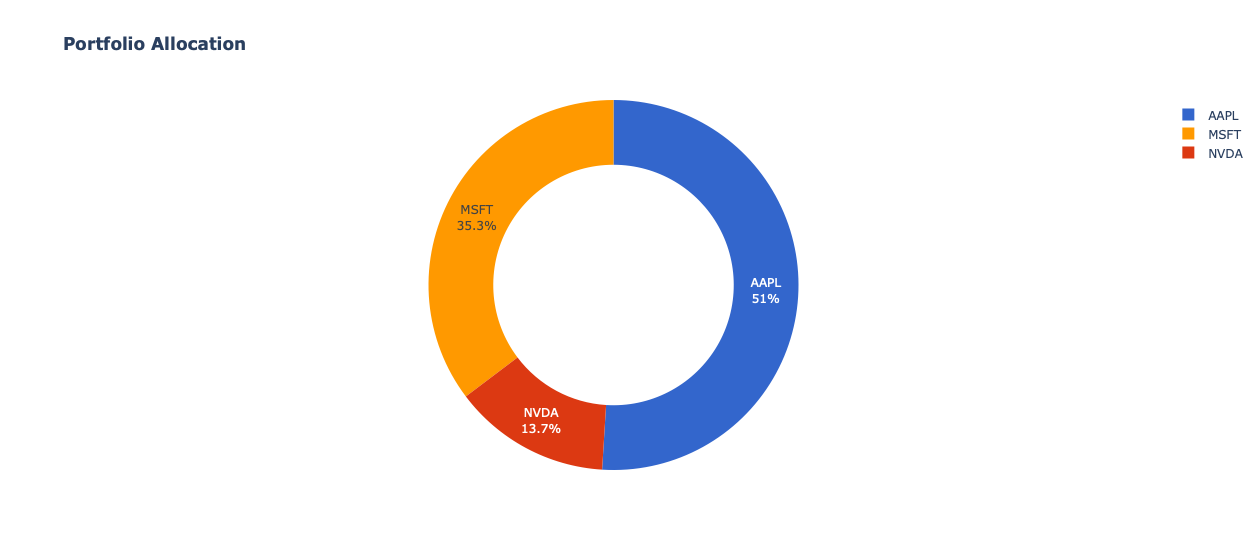

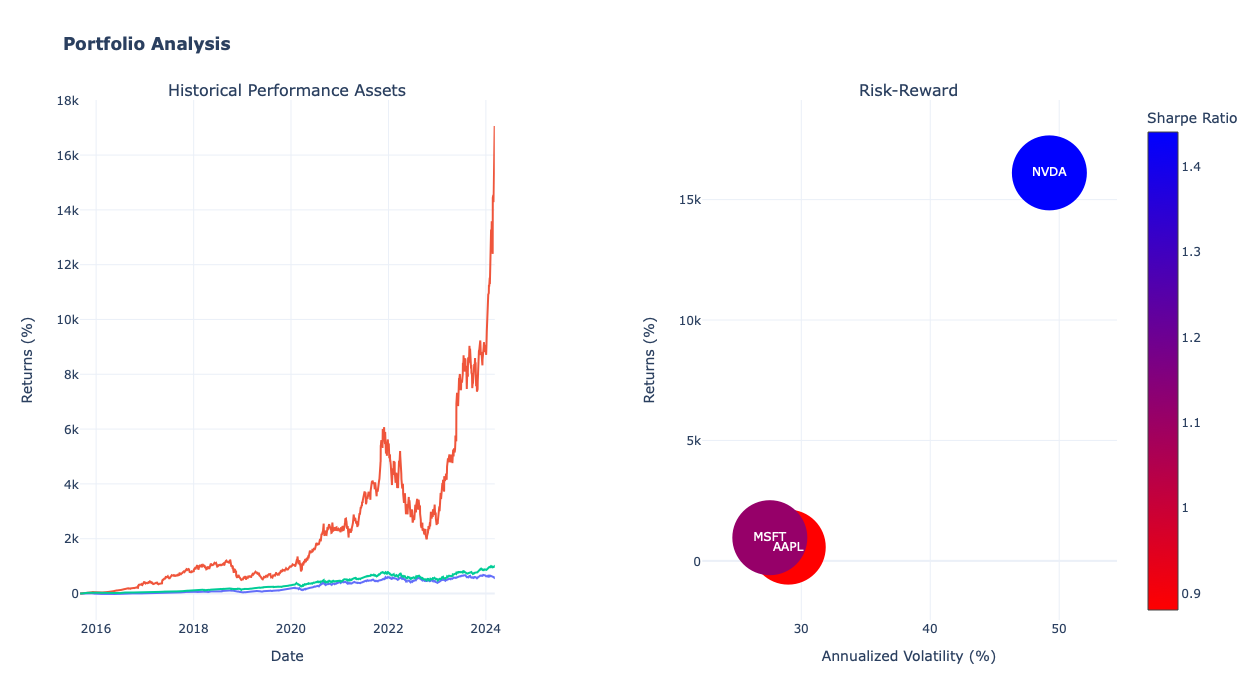

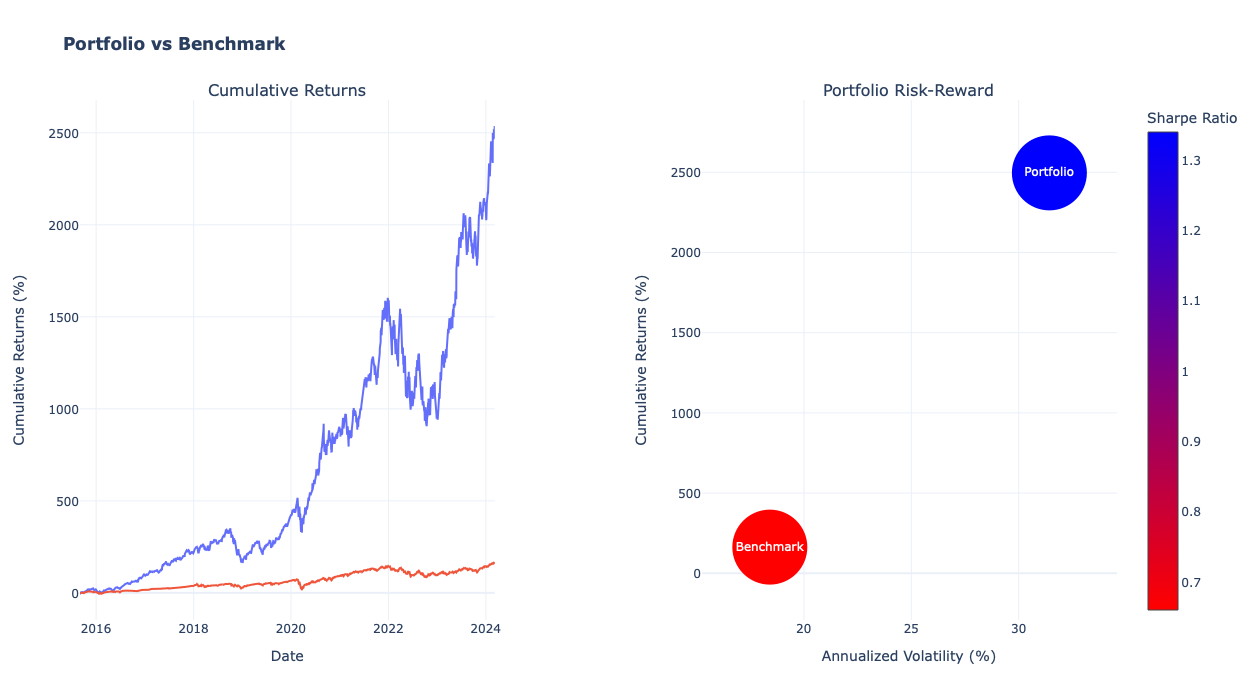

In [46]:
portfolio_returns(tickers, '2015-09-02', '2024-03-09', '^GSPC')

<p style="font-family: 'Arial', sans-serif; font-size: 20px;color: #000000;">In the first plot, you can see the percentage value of each security in the overall portfolio's value. In the second plot, you can compare the performance of each security individually and see that NVDA outperformed AAPL and MSFT during the period, presenting an overall higher Sharpe ratio. You can also see in the third plot that the portfolio outperforms the benchmark during the period.</p>

<p style="font-family: 'Arial', sans-serif; font-size: 20px;color: #000000;">You can also try a portfolio consisting of only one single security.</p>

In [47]:
# Defining a dictionary consisting of only one ticker and invested amount
tickers = {
    'BTC-USD': 222950
}

<p style="font-family: 'Arial', sans-serif; font-size: 20px;color: #000000;">Let's compare Bitcoin's performance with the S&amp;P 500's performance from January 20th, 2018 to January 08th, 2024.</p>

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


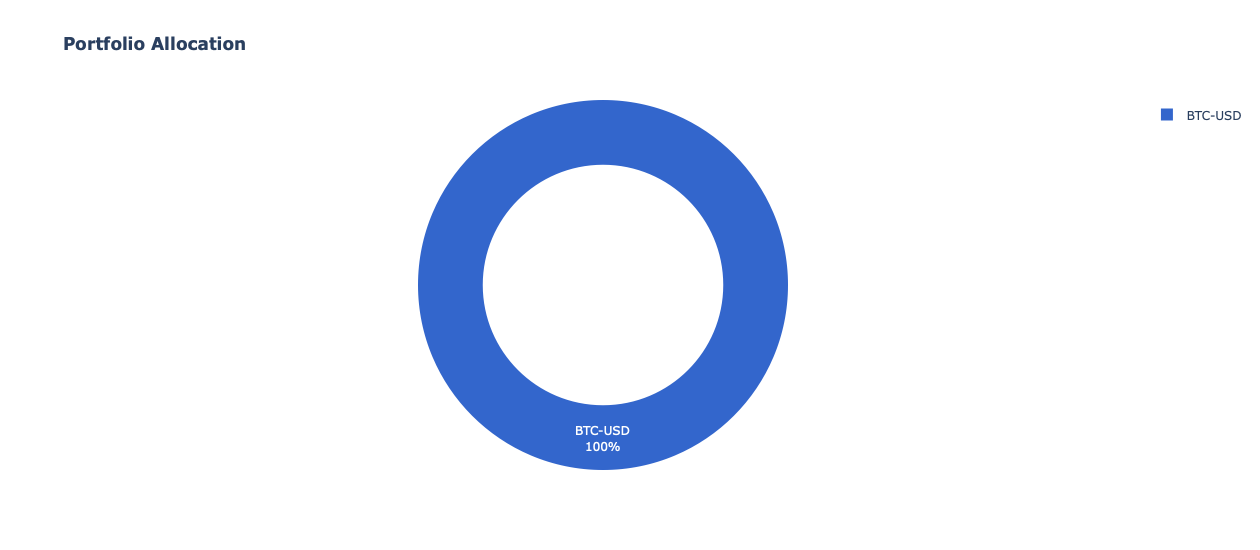

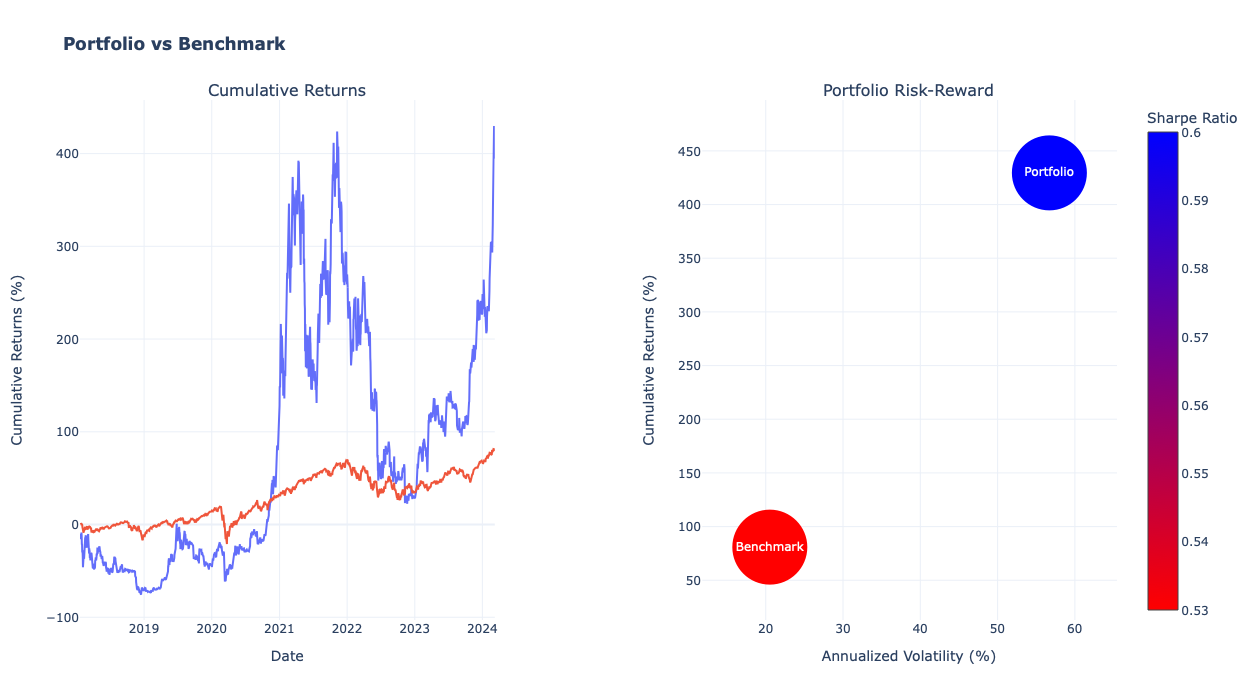

In [48]:
portfolio_returns(tickers, '2018-01-20', '2024-03-09', '^GSPC')

<p style="font-family: 'Arial', sans-serif; font-size: 20px;color: #000000;">Since we are analyzing a portfolio consisting of only one security, we don't need to display the plot where we compare each security in the portfolio individually.</p>

<p style="font-family: 'Arial', sans-serif; font-size: 20px;color: #000000;">You should also be aware of the date range. If there is no data available for a security within the date range, the function will output an error. Let's try creating a portfolio with Tesla shares starting in 2006. Tesla only went public in 2010.</p>

In [49]:
# Defining a dictionary consisting of only one ticker and invested amount
tickers = {
    'TSLA': 200,
    'AAPL': 400
}

In [50]:
portfolio_returns(tickers, '2006-01-20', '2024-01-08', '^GSPC')

[*********************100%***********************]  2 of 2 completed

 No data available for the following tickers starting from 2006-01-20: TSLA
